<a target="_blank" href="https://colab.research.google.com/github/ginal001/ML-2024-2025/blob/main/Lab3/Homework03.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




## Solution

We will focus on set Wisconsin Breast Cancer. Firstly, we are going to download the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score
)

breast_cancer = load_breast_cancer()

Let's prepare our data. We define input variables as X and output variable as y. We keep our dataset as pandas dataframe also. 

In [2]:
X = breast_cancer.data
y = breast_cancer.target

scaler = StandardScaler()
X = scaler.fit_transform(X) # scalling predictors

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)   # converting dataset into pandas dataframe for preprocessing
data['class'] = breast_cancer.target

Having a dataframe, we can easily visualise our data.

In [3]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


The Breast Cancer Wisconsin dataset describes features of breast tumors based on images obtained from fine needle aspiration (FNA). It includes numerical measurements of psychical properties of tumor. 

Let's split our dataset for fitting logistic regression model. We use 3 subsets: one for traininig, one for validation and one for testing. We are going to split in proportion 60/20/20 and use stratification of data to better capture statistical properties among subsets.

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=39, stratify=y)  # 60% training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=39, stratify=y_temp)  # 20% each for validation and testing

Now we can fit our model.

In [5]:
model = LogisticRegression().fit(X_train, y_train)

We will try to find optimal threshold.  To do so, we are going to plot ROC curve and use Youden Statisitc to find best point. In the next chunk, we use model to predict probabilities on validation set and then we plot ROC curve. 

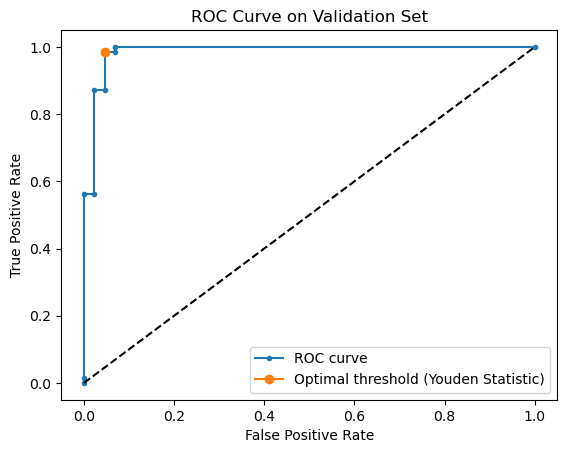

In [6]:
y_val_prob = model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr) #using Youden statistic
optimal_threshold = thresholds[optimal_idx]

plt.figure()
plt.plot(fpr, tpr, label='ROC curve', marker = '.')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], marker = 'o', label = 'Optimal threshold (Youden Statistic)')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Set')
plt.legend(loc="lower right")
plt.show()

In [7]:
print("Calculated AUC:", auc(fpr, tpr))

Calculated AUC: 0.986570586308549


As we found the optimal threshold, we can finally test our model on test subset. 

In [8]:
print("Optimal threshold determined from ROC:", optimal_threshold)

y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (fn + tp)

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy}")
print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"\nSpecificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

Optimal threshold determined from ROC: 0.7187954245002067

Test Set Performance:
Accuracy: 0.9824561403508771

Precision: 1.0
Recall: 0.9722222222222222
F1-Score: 0.9859154929577465

Specificity: 1.0
Sensitivity: 0.9722222222222222


We've got really good results! But we could (and maybe we should) choose other threshold. We've choosed threshold which maximises tradeoff between sensitivity and specifity. In most cases it's optimal but in our case, when we try to predict malice of cancer, we can maximise sensitivity (becasue false positive is way more less dangerous than false negative). So we will repeat testing our model (with threshold maximising sensitivity).

In [9]:
optimal_idx_sensitivity = np.argmax(tpr)
optimal_threshold_sensitivity = thresholds[optimal_idx_sensitivity]
print("Optimal threshold for maximising sensitivity", optimal_threshold_sensitivity)

y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= optimal_threshold_sensitivity).astype(int)

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (fn + tp)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (fn + tp)

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy}")
print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"\nSpecificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

Optimal threshold for maximising sensitivity 0.3169613882957578

Test Set Performance:
Accuracy: 0.9912280701754386

Precision: 0.9863013698630136
Recall: 1.0
F1-Score: 0.993103448275862

Specificity: 0.9761904761904762
Sensitivity: 1.0


# Answers for questions 

**1.**

**2.** Defining better results it's not straightforward task and depends on dataset context. In some cases we would like to maximise sensitivty and in others we would like to maximise specifity. Let's consider two examples:
- **Diseases detection**: High sensitivity is usually more valuable to ensure that as many cases as possible are identified, even if it means some false positives (as done in notebook).
- **Spam Filtering**: High Specificity might be more important to avoid incorrectly classifying legitimate cases, even if that means missing a few true positives.

**2.**

**4.** ROC Curve is really useful to decide the best threshold. It is plot *False Positive Rate* against *True Positive Rate*. (so *Specifity* against *1 - Sensitivty*). By analyzing the ROC curve, we can choose the optimal threshold - most often, it’s the one closest to (0, 1) (best tradeoff between *Specifity* and *Sensitivity*) but we can also choose thresholds next to it (if we want to maximise one of them).

**5.**